# Máximo valor de visibilidad en 15 horas

Para cada conjunto de datos con los distintos intervalos horarios, ver el máximo valor de visibilidad (RVR) para 15h.

__Cargar librerías y datos__

In [1]:
import os
import sys
import getpass
import bz2
import pickle # Rick!

import numpy as np
import pandas as pd
import math

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt

df_5m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_5m.csv")
df_15m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_15m.csv")
df_30m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_30m.csv")
df_45m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_45m.csv")
df_60m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_60m.csv")
df_75m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_75m.csv")
df_90m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_90m.csv")
df_120m = pd.read_csv("../../Data/csv/dB_eventos/dB_ventana3_120m.csv")

In [25]:
def get_closest(data, interval, value=15):
    """Recibe los datos  y el intervalo. Hace
    las operaciones necesarias para encontrar el valor
    más proximo a las value horas en el dataset.
        - data: objeto de pandas con valores de duración de niebla
        - interval: intervalo de las mediciones en los datos en minutos
        - value: valor de horas que se está buscando, por defecto, 15h
    """
    #Obtener los valores de duración pasados a minutos, y con valores únicos 
    interval_mints = (data.unique()*interval)
    #Obtener el valor de 15h en minutos
    h15_val = (value*60)
    
    #Buscar el valor más próximo al deseado
    #Obtener el valor con la mínima diferencia al valor buscado, obtener su índice y obtener el valor
    closest_value = interval_mints[(abs(interval_mints - h15_val)).argmin()]
    
    #Devolver valores más próximos encontrados
    return closest_value

def get_max_vis_15h(data, interval):
    """Recibe los datos y el intervalo de medición que se ha usado
    y devuelve el valor de duración más próximo encontrado y el valor de máxima visibilidad asociado
    """
    #Obtener el valor más próximo a 15h
    closest_val = get_closest(data["dur"], interval)
    #Para todos los valores originales, buscar cuáles tienen esa duración y encontrar el máximo valor de
    #visibilidad
    idx = (data["dur"] == (closest_val/interval))
    
    #Sacar el valor con mayor visibilidad
    idx_max_vis = data[idx]["min"].idxmax()
    #Devolver un par (dur_cercana, min_visibilidad)
    return ((data[idx]["dur"][idx_max_vis]*interval)/60, data[idx]["min"][idx_max_vis])

def plot_data(data,p,d,v):
    """Plotea los datos con la línea que muestra el máximo
        - data: datos
        - p: intervalo
        - d: duración
        - v: visibilidad
    """
    #Plotear los datos con los valores del máximo de mínima visibilidad para 15h
    #fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.title("{}m: {:.4f}h -> max={:.4f}".format(p,d,v))
    sns.scatterplot(x=data["min"],y=data["dur"])
    #Dibujar líneas Hor y Vert
    sns.lineplot(x=np.linspace(0,v,10),
                 y=[(d*60)/p]*10,
                 color="red")
    #sns.lineplot(x=[v]*100,
    #             y=np.linspace(0,(d*60)/p,100),
    #             color="red")

__Para intervalos de 5m__

In [41]:
data = df_5m.iloc[:,[-2,-1]]
p=5

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


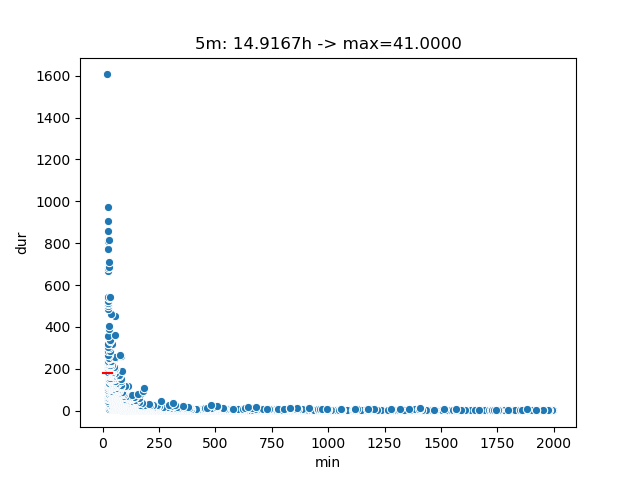

In [42]:
%matplotlib notebook

plot_data(data,p,d,v)

__Para intervalos de 15m__

In [27]:
data = df_15m.iloc[:,[-2,-1]]
p=15

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


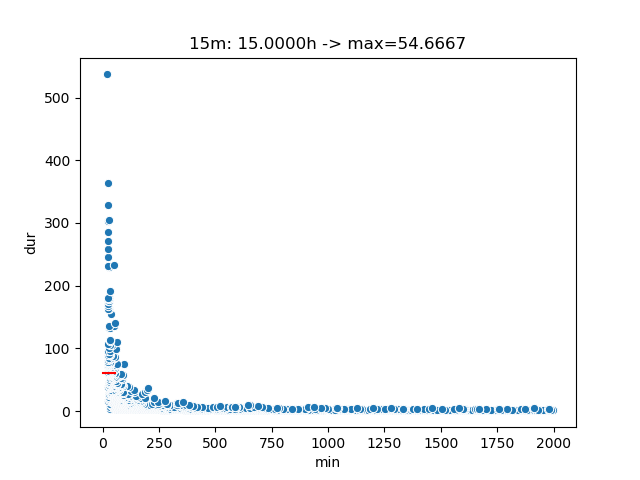

In [28]:
%matplotlib notebook

plot_data(data,p,d,v)

__Para intervalos de 30m__

In [29]:
data = df_30m.iloc[:,[-2,-1]]
p=30

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


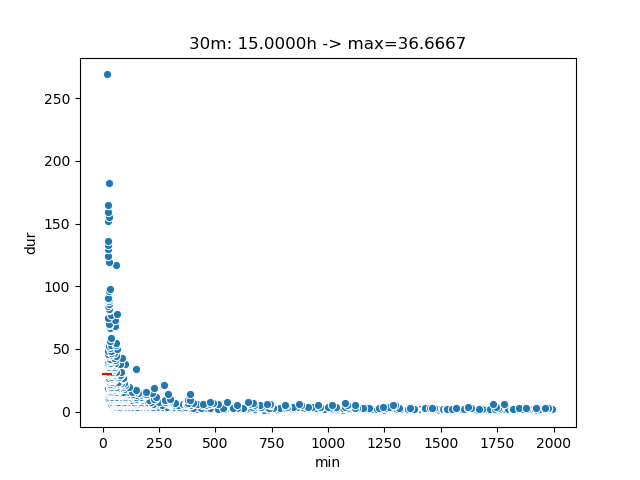

In [30]:
%matplotlib notebook

plot_data(data,p,d,v)

__Para intervalos de 45m__

In [31]:
data = df_45m.iloc[:,[-2,-1]]
p=45

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


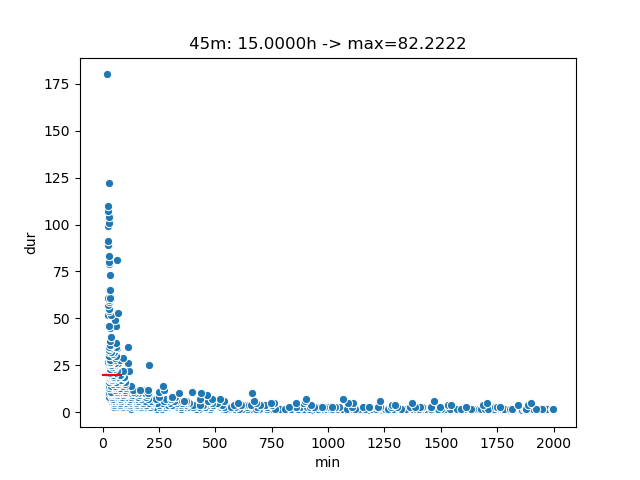

In [32]:
%matplotlib notebook

plot_data(data,p,d,v)

__Para intervalos de 60m__

In [33]:
data = df_60m.iloc[:,[-2,-1]]
p=60

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


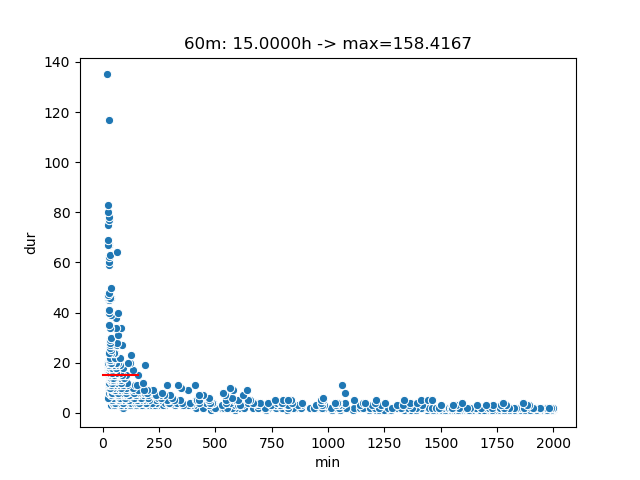

In [34]:
%matplotlib notebook

plot_data(data,p,d,v)

__Para intervalos de 75m__

In [35]:
data = df_75m.iloc[:,[-2,-1]]
p=75

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


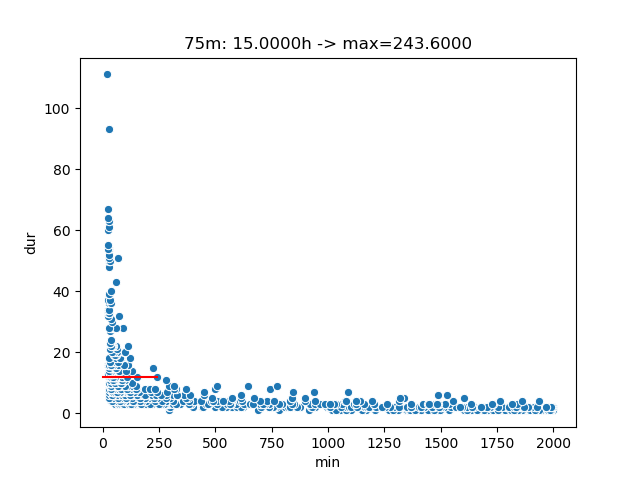

In [36]:
%matplotlib notebook

plot_data(data,p,d,v)

__Para intervalos de 90m__

In [37]:
data = df_90m.iloc[:,[-2,-1]]
p=90

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


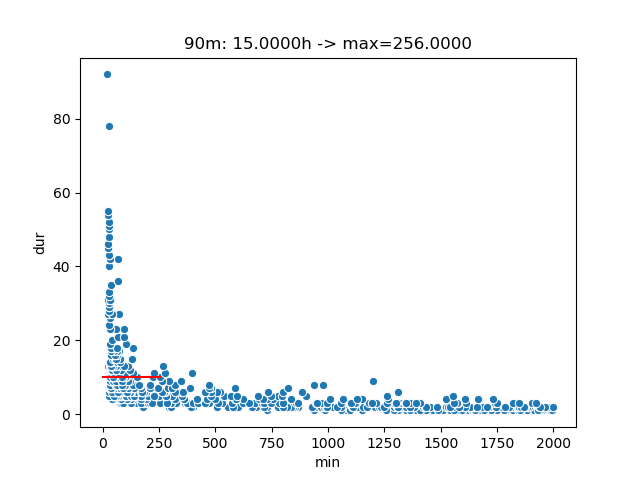

In [38]:
%matplotlib notebook

plot_data(data,p,d,v)

__Para intervalos de 120m__

In [39]:
data = df_120m.iloc[:,[-2,-1]]
p=120

[d,v] = get_max_vis_15h(data, p)

<IPython.core.display.Javascript object>


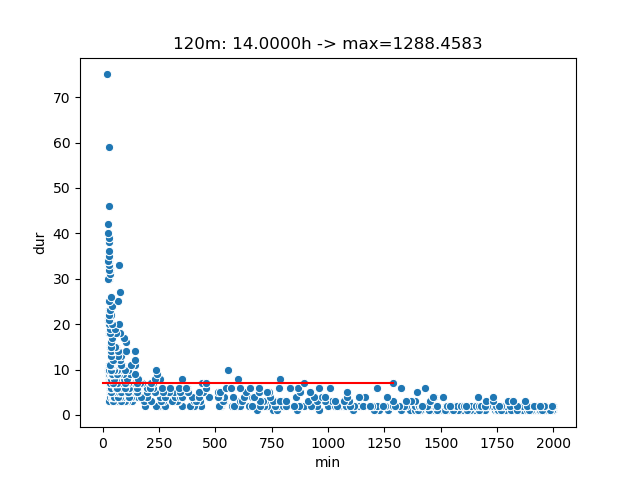

In [40]:
%matplotlib notebook

plot_data(data,p,d,v)